<a href="https://colab.research.google.com/github/GadirajuSanjayvarma/S15/blob/master/Assignment15_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[README FILE FOR THIS COLAB NOTEBOOK WITH COMPLETE EXPLAINATION](https://github.com/GadirajuSanjayvarma/S15/blob/master/README.md)

# It is used to empty cache if we restart runtime or if we get cuda out of memory error

In [0]:
import torch
torch.cuda.empty_cache()

## Importing Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# used to remove google drive and to import  new one in middle of program execution without restart runtime

In [0]:
from google.colab import drive
drive.flush_and_unmount()

# Appending paths to our library

In [0]:
import sys
sys.path.append("/content/drive/My Drive/EVA4/")

# Going to content directory and making a new folder data for storing our training and testing data

In [0]:
cd /content

/content


In [0]:
!mkdir data

# generally we will get CUDA OUT OF MEMORY ERROR if we are out of ram.So we will generally find all the process running and except first one which maintaines the state we will kill all the remaining process to save ram

In [0]:
!ps -aux|grep python

root          23  0.3  0.4 490368 107420 ?       Sl   05:03   0:29 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --MappingKernelManager.root_dir="/content"
root        3179 66.1  7.8 54461488 2101864 ?    Ssl  07:05   5:13 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-4bf03917-f12d-4a92-8d43-c55018801ab8.json
root        3425  0.0  0.0  39196  6456 ?        S    07:13   0:00 /bin/bash -c ps -aux|grep python
root        3427  0.0  0.0  38572  5572 ?        S    07:13   0:00 grep python


In [0]:
!kill -9 3179 3425 3427

# Now we will go to our content and then to our data folder

In [0]:
cd /content

/content


In [0]:
cd data

/content/data


# Now open drive
## 1)Select the required folder
## 2) Drag and drop the folder to data folder
## 3)After turn off wifi and allow the colab to disconnect itself
## 4)After that turn on wifi again and we will have the folder again in that data folder.

In [0]:
ls

dataset_forAssignment/


In [0]:
cd dataset_forAssignment

/content/data/dataset_forAssignment


In [0]:
ls

 bg_images/  'Copy of out2.zip'


# Now extract the zip file in this directory 

In [0]:
import time
start=time.time()
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('Copy of out2.zip', 'r') as zipObj:
# Extract all the contents of zip file in current directory
  zipObj.extractall()
print(time.time()-start)

203.04322814941406


# Here we are loading the respective files paths in lists.After loading respective paths we are going to combine all paths into group of lists using zip function.Then we are going to apply random.shuffle 

In [0]:
cd /content

/content


In [0]:
import glob
from PIL import Image
import matplotlib.pyplot as plt
import random
from  tqdm import tqdm_notebook
import torch
import numpy as np

# now we are going to resize background images(since they are limited)images to 100x100 from 160x160.

In [0]:
for i in tqdm_notebook(range(1,23)):
        img1=Image.open("/content/data/dataset_forAssignment/bg_images/Copy of bgimg{}.jpg".format(str(i).zfill(3)))
        img1.thumbnail((100,100))
        img1.save("/content/data/dataset_forAssignment/bg_images/Copy of bgimg{}.jpg".format(str(i).zfill(3)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [0]:
cd /content

/content


## Loading data paths to respective lists

In [0]:
fg_bg_images=[]
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(88000)):
      fg_bg_images+=["/content/data/dataset_forAssignment/output/images/fgbg{}.jpg".format(str(i).zfill(6))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from  tqdm import tqdm_notebook
bg_images=[]
for i in tqdm_notebook(range(1,23)):
      for k in range(4000):
        bg_images+=["/content/data/dataset_forAssignment/bg_images/Copy of bgimg{}.jpg".format(str(i).zfill(3))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
masks_images=[]
for i in tqdm_notebook(range(88000)):
      masks_images+=["/content/data/dataset_forAssignment/output/masks/mask{}.jpg".format(str(i).zfill(6))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [0]:
depth_images=[]
for i in tqdm_notebook(range(88000)):
      depth_images+=["/content/data/dataset_forAssignment/output/depth/fgbg{}.jpg".format(str(i).zfill(6))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


## Making combination of the respective lists into a single list

In [0]:
dataset=list(zip(fg_bg_images,bg_images,masks_images,depth_images))

In [0]:
depth_images.clear()
masks_images.clear()
bg_images.clear()
fg_bg_images.clear()

In [0]:
random.shuffle(dataset)

In [0]:
print(len(dataset))

88000


In [0]:
import numpy as np

# displaying dataset combined list images 

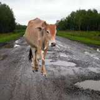

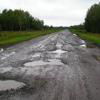

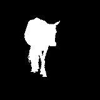

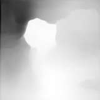

In [0]:
img1=Image.open(dataset[10][0])
img1.thumbnail((100,100))
display(img1)
img1=Image.open(dataset[10][1])
img1.thumbnail((100,100))
display(img1)
img1=Image.open(dataset[10][2])
img1.thumbnail((100,100))
display(img1)
img1=Image.open(dataset[10][3])
img1.thumbnail((100,100))
display(img1)

In [0]:
a=np.asarray(Image.open(dataset[10][2]))
print(a.max())

255


# creating train_dataset and test_dataset by dividing into 70-30%

In [0]:
train_dataset=[x for i,x in enumerate(dataset) if (i<(0.7*len(dataset)))] 
test_dataset=[x for i,x in enumerate(dataset[(int)(0.7*len(dataset)):]) if (i<(0.3*len(dataset)))]

In [0]:
dataset.clear()

# Calculation of mean and standard deviation of dataset

## calculation of fg_bg datset

In [0]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
import cupy as cp 
'''numpy executes on cpu even though you are on gpu.So i am using cupy which will execute on gpu and 10 times faster than numpy only on larger operations'''
import glob
n = 0
s = cp.zeros(3)
sq = cp.zeros(3)
for i in tqdm_notebook(range(88000)):
  data=Image.open('/content/data/dataset_forAssignment/output/images/fgbg{}.jpg'.format(str(i).zfill(6)))
  x = cp.array(data)/255
  s += x.sum(axis=(0,1))
  sq += cp.sum(cp.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = cp.sqrt((sq/n - cp.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.



[0.50269264 0.55886688 0.53427412] [0.30498183 0.36336472 0.36682804] [0.22865243 0.2259038  0.2852704 ] 2252800000


# calculation of depth dataset

In [0]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
import cupy as cp
import glob
n = 0
s = cp.zeros(1)
sq = cp.zeros(1)
for i in tqdm_notebook(range(88000)):
  data=Image.open('/content/data/dataset_forAssignment/output/depth/fgbg{}.jpg'.format(str(i).zfill(6)))
  x = cp.array(data)/255
  s += x.sum(axis=(0,1))
  sq += cp.sum(cp.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = cp.sqrt((sq/n - cp.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



[0.56502286] [0.3864049] [0.25914103] 2252800000


## calculation of background dataset

In [0]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
import cupy as cp
import glob
n = 0
s = cp.zeros(3)
sq = cp.zeros(3)
for i in tqdm_notebook(range(1,23)):
  data=Image.open("/content/data/dataset_forAssignment/bg_images/Copy of bgimg{}.jpg".format(str(i).zfill(3)))
  x = cp.array(data)/255
  s += x.sum(axis=(0,1))
  sq += cp.sum(cp.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = cp.sqrt((sq/n - cp.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



[0.4989028  0.57832073 0.55895807] [0.29840588 0.38086498 0.39226052] [0.22249018 0.21543007 0.28253565] 220000


# Applying transformations on the background,foreground_background, depth images and mask images.

In [0]:
from eva4datatransforms import AlbumentationTransforms
import albumentations.augmentations.transforms as A
 #88k images
mean_depth=(0.56502286)
std_depth=(0.25914103)
mean_fgbg=(0.50269264,0.55886688,0.53427412)
std_fgbg=(0.22865243,0.2259038,0.2852704)
mean_bg=(0.4989028,0.57832073,0.55895807)
std_bg=(0.22249018,0.21543007,0.28253565)
background_transforms=AlbumentationTransforms(
  [
   
   A.Normalize(mean=mean_bg, std=std_bg),
 
  ]  
  
)
depth_transforms=AlbumentationTransforms(
  [
   
   A.Normalize(mean=mean_depth, std=std_depth),
 
  ]  
  
)
fgbg_transforms=AlbumentationTransforms(
  [
   
   A.Normalize(mean=mean_fgbg, std=std_fgbg),
 
  ]  
  
)
mask_transforms=AlbumentationTransforms(
  [
   
  
  ]  
  
)
train_transforms=(fgbg_transforms,background_transforms,mask_transforms,depth_transforms)
background_transforms1=AlbumentationTransforms(
  [
   
   A.Normalize(mean=mean_bg, std=std_bg),
  ]  
  
)
depth_transforms1=AlbumentationTransforms(
  [
   
   A.Normalize(mean=mean_depth, std=std_depth),
 
  ]  
  
)
fgbg_transforms1=AlbumentationTransforms(
  [
   
   A.Normalize(mean=mean_fgbg, std=std_fgbg),
 
  ]  
  
)
mask_transforms1=AlbumentationTransforms(
  [
   
 
  ]  
  
)
test_transforms=(fgbg_transforms1,background_transforms1,mask_transforms1,depth_transforms1)

# Loading the dataset into batches by using get_dataset class and DataLoader class

In [0]:
from eva4batchLoader import get_dataset
from eva4dataloaders import DataLoader
train=get_dataset(train_dataset,transforms=train_transforms)
test=get_dataset(test_dataset,transforms=test_transforms)
dataloader=DataLoader(batch_size=40)
train_loader=dataloader.load(train)
test_loader=dataloader.load(test)

# Visualizing the dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([40, 3, 100, 100])
torch.Size([40, 3, 100, 100])
torch.Size([40, 100, 100])
torch.Size([40, 100, 100])


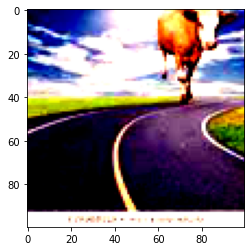

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


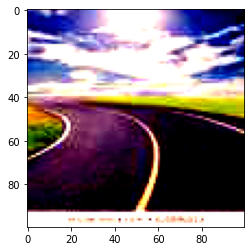

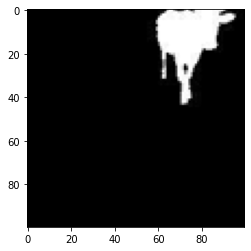

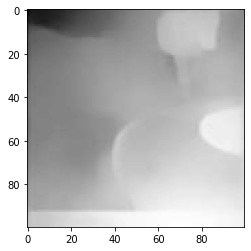

In [0]:
dataiter=iter(train_loader)
input1,input2,output1,output2=dataiter.next()
print(input1.shape)
print(input2.shape)
print(output1.shape)
print(output2.shape)
plt.imshow(input1[0].numpy().transpose(1,2,0))
plt.show()
plt.imshow(input2[0].numpy().transpose(1,2,0))
plt.show()
plt.imshow(output1[0].numpy(),cmap="gray")
plt.show()
plt.imshow(output2[0].numpy(),cmap="gray")
plt.show()

# Model declaration.
# The model takes input of 100x100x3 , 100x100x3 and giving output 100x100x1,100x100x1.
# The recceptive field of model is 205X205,39X39(multiple receptive fields) 

# If we want to load a model then we can use torch.load() function.

================================================================

Total params: 1,340,224

Trainable params: 1,340,224

Non-trainable params: 0
----------------------------------------------------------------

Input size (MB): 3433.23

Forward/backward pass size (MB): 357.82

Params size (MB): 5.11

Estimated Total Size (MB): 3796.16

----------------------------------------------------------------

In [0]:
import torch
from eva4models1 import depth_mask_model
model = depth_mask_model(name="depth_model_48k_images") #use load_state_dict if there is a saved model
model.load_state_dict(torch.load("/content/drive/My Drive/depth_model_48k_images.pt"))
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
model.summary((3,100,100),(3,100,100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 100, 100]             432
       BatchNorm2d-2         [-1, 16, 100, 100]              32
              ReLU-3         [-1, 16, 100, 100]               0
            Conv2d-4         [-1, 16, 100, 100]           2,304
       BatchNorm2d-5         [-1, 16, 100, 100]              32
              ReLU-6         [-1, 16, 100, 100]               0
            Conv2d-7         [-1, 32, 100, 100]           4,608
       BatchNorm2d-8         [-1, 32, 100, 100]              64
              ReLU-9         [-1, 32, 100, 100]               0
           Conv2d-10         [-1, 32, 100, 100]           9,216
      BatchNorm2d-11         [-1, 32, 100, 100]              64
             ReLU-12         [-1, 32, 100, 100]               0
           Conv2d-13         [-1, 16, 100, 100]             432
      BatchNorm2d-14         [-1, 16, 1

# Initialising the tensorboard writer

In [0]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/model_visualization1')

# sending values to the tensorboard

In [0]:
image1=image1.cuda()
image2=image2.cuda()
writer.add_graph(model,(image1,image2))
writer.close()

# The above commands run tensorboard on the output cell

In [0]:
%reload_ext tensorboard
%tensorboard --logdir /content/runs

# This is used to get Nvidia MixedPrecision in our model but i never used this one but it is useful if you really need to compromise the accuarcy for memory.I compromised on my model architecture , input image size and i didn't use this mixed precision.It will not improve any speed but it will reduce memory usage by converting  floating type values of type32 to type 16

# apex

In [0]:
cd /content

/content


In [0]:
!git clone https://www.github.com/nvidia/apex

Cloning into 'apex'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 6898 (delta 79), reused 65 (delta 41), pack-reused 6789
Receiving objects: 100% (6898/6898), 13.78 MiB | 7.50 MiB/s, done.
Resolving deltas: 100% (4621/4621), done.


In [0]:
cd apex

/content/apex


In [0]:
rm -rf build (if it exists)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `rm -rf build (if it exists)'


# installing apex

In [0]:
import time
start=time.time()
!python setup.py install --cuda_ext --cpp_ext
print(time.time()-start)

importing apex into present environment

In [0]:
try:
    from apex import amp
    APEX_AVAILABLE = True
except ModuleNotFoundError:
    APEX_AVAILABLE = False
    print("not found")

# lr range finder of pytorch which is used to find minimum learning rate and maximum learning rate of one cycle lr by checking it by running for few epochs and increasing learning rate linearly

In [0]:
#optimizer = optim.SGD(model.parameters(), lr=1,momentum=0.9,nesterov=True)
from eva4LrRangeFinder import lrRangeFinder
criterion=[nn.BCEWithLogitsLoss(),nn.L1Loss()]
optimizer = optim.SGD(model.parameters(), lr=0.01)
lrFinder=lrRangeFinder(model,train_loader,criterion,optimizer)
lr,train_accuracy,loss=lrFinder.plot(6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
print(lr)
print(train_accuracy)
max_lr=lr[train_accuracy.index(max(train_accuracy))]

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0]
[0.750829682747523, 1.4292672363065537, 1.7931644582100923, 2.1582331936673396, 2.5276784294104258, 2.8774419202048906]


In [0]:
print(max_lr)

1.0


# lrRangeTest max_lr is 1.0

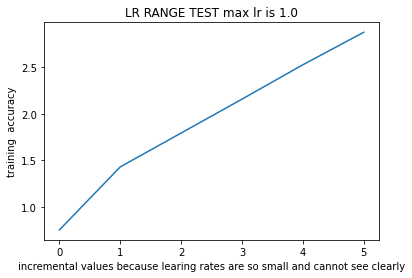

In [0]:
import matplotlib.pyplot as plt
plt.plot(train_accuracy)
plt.title('LR RANGE TEST max lr is {}'.format(max_lr))
plt.ylabel('training  accuracy')
plt.xlabel('incremental values because learing rates are so small and cannot see clearly')
#plt.legend(['without L1 and L2', 'with L1','with L2','With L1 and L2'], loc='upper left')
plt.show()

# If you are continuing training use this cell to load the state of model and continue training from where you left off 

In [0]:
model=depth_model_new(name="depth_model_48k_images")
model.load_state_dict(torch.load("/content/drive/My Drive/depth_model_48k_images.pt"))
model.device = "cuda"

# Actually i need to train it on 400K images but due to disconnectivity and since it is an open problem i thought it will be good to train on 88,000 images instead of 400000 k images.
# Initially i have done this for 8 epochs but colab gets disconnected and output gets vanished so i cannot show you the development from scratch but i stored those pictures here so that you can watch the development process form epoch 1 to epoch 13 including these 5 epochs.SO i ran it for five epochs in this cell by loading model which is developed from the eight epochs
[Images folder](https://drive.google.com/drive/folders/1untlYjJkzxJgURBvyJy8qtl08FbPRxqV?usp=sharing)

# In results left image is original image and right one is ground truth image.

Initial LR-  [0.09999999999999998]
Total steps -  7705
No.of steps to increase LR - 2310.5
No.of steps to reduce LR -  5393.5


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:1206: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)



Validation loss decreased (100000 --> 0.008950025774538517).  Saving model ...
Epoch: 1, Train set: Average loss: 0.0092, Accuracy: 42.53%; Test set: Average loss: 0.0090, Accuracy: 41.66%
Learning Rate = 0.100000
printing results
masks


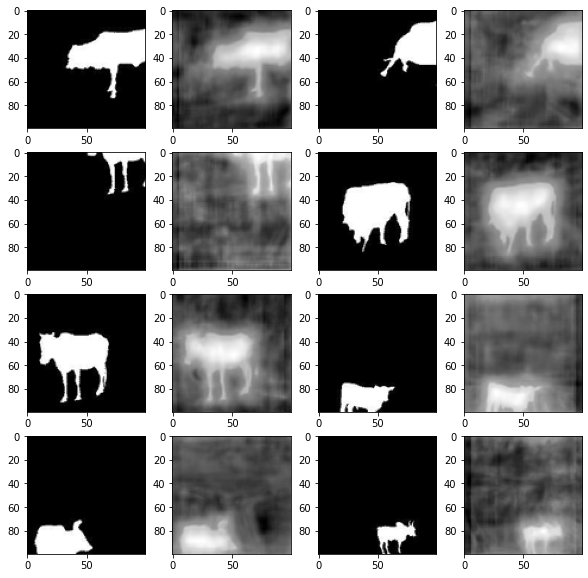

scaling masks between 0 and 1


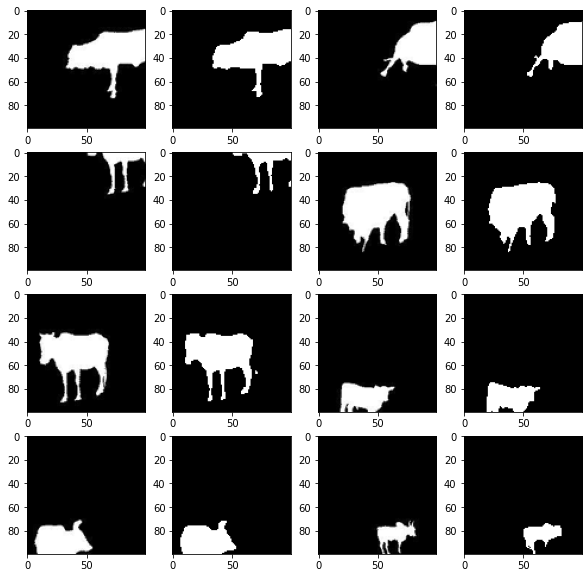

printing depth images


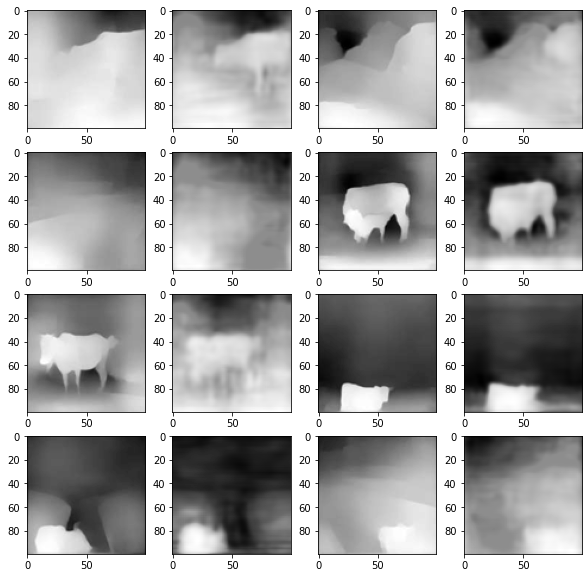


Validation loss decreased (0.008950025774538517 --> 0.00849837064743042).  Saving model ...
Epoch: 2, Train set: Average loss: 0.0090, Accuracy: 39.81%; Test set: Average loss: 0.0085, Accuracy: 40.09%
Learning Rate = 0.100000
printing results
masks


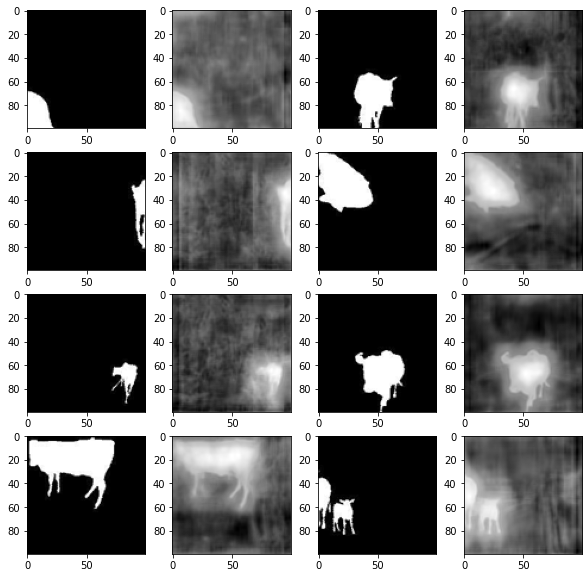

scaling masks between 0 and 1


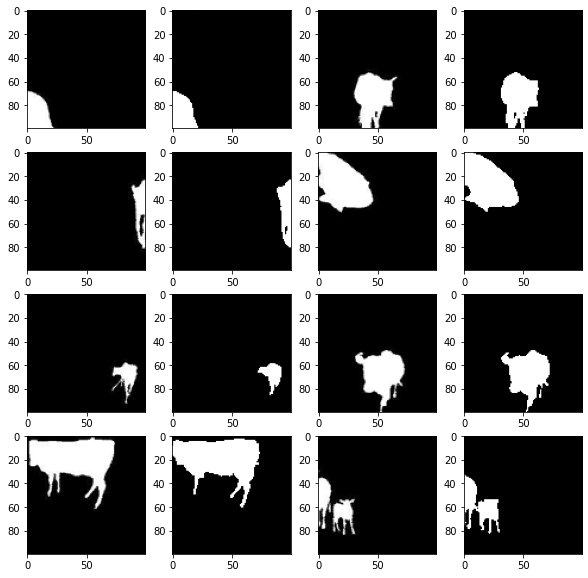

printing depth images


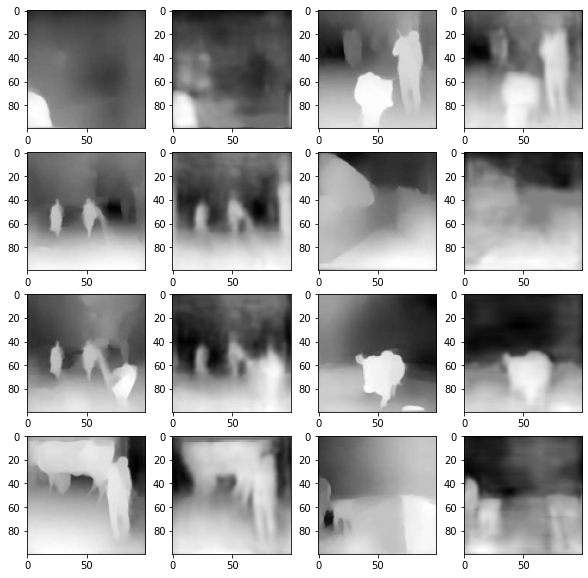


Epoch: 3, Train set: Average loss: 0.0089, Accuracy: 42.03%; Test set: Average loss: 0.0086, Accuracy: 40.29%
Learning Rate = 0.100002
printing results
masks


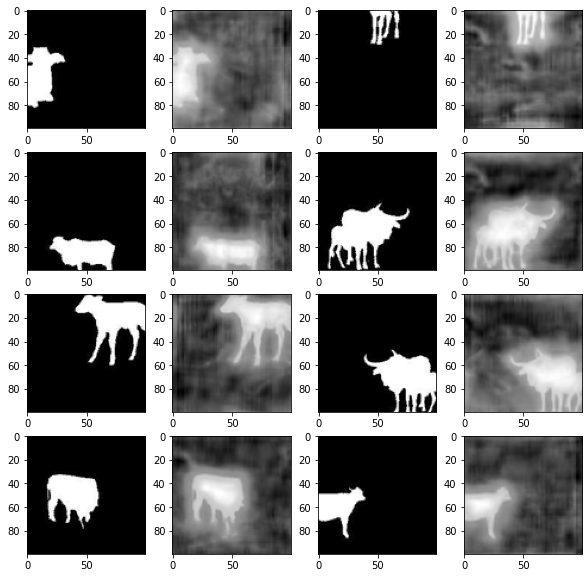

scaling masks between 0 and 1


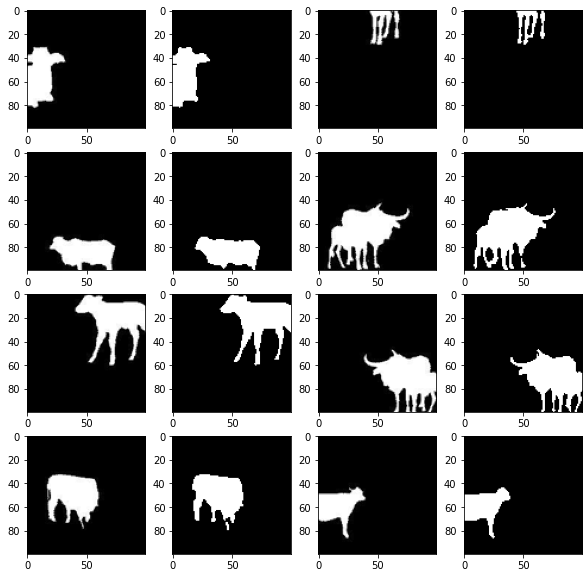

printing depth images


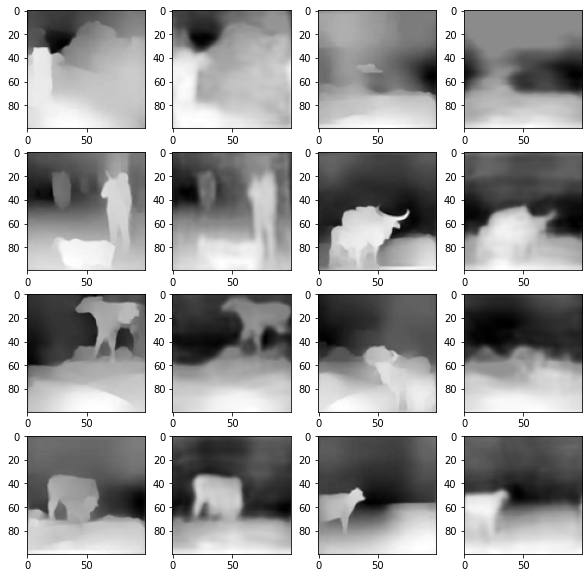


Epoch: 4, Train set: Average loss: 0.0087, Accuracy: 40.11%; Test set: Average loss: 0.0087, Accuracy: 40.67%
Learning Rate = 0.100004
printing results
masks


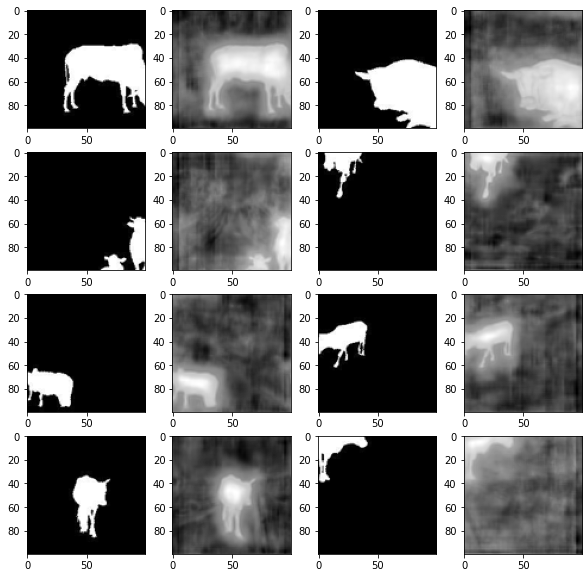

scaling masks between 0 and 1


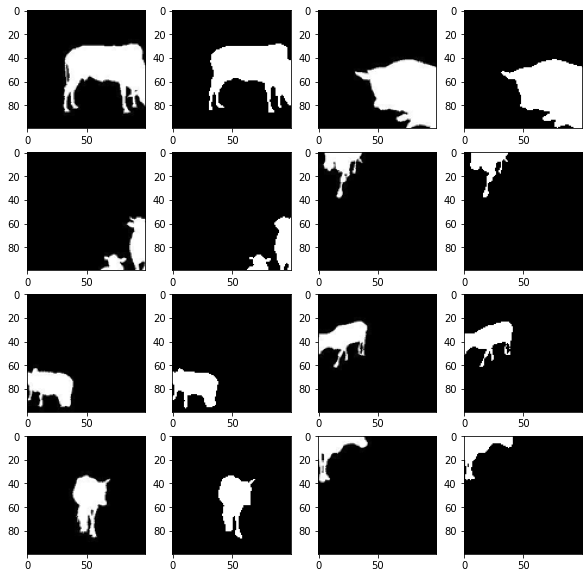

printing depth images


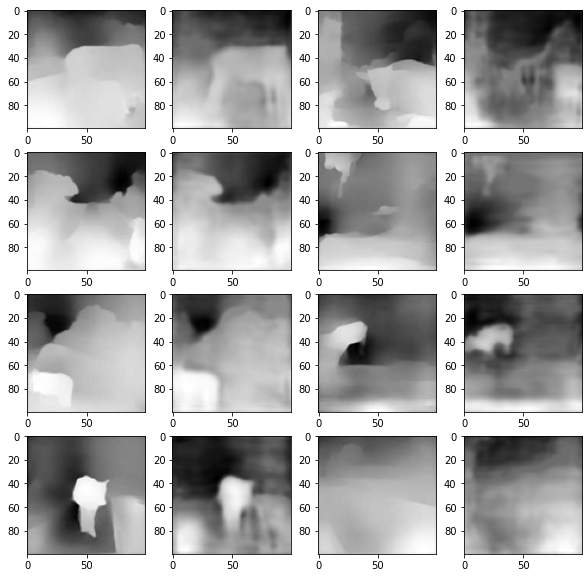


Validation loss decreased (0.00849837064743042 --> 0.00829687062650919).  Saving model ...
Epoch: 5, Train set: Average loss: 0.0086, Accuracy: 41.80%; Test set: Average loss: 0.0083, Accuracy: 40.15%
Learning Rate = 0.100007
printing results
masks


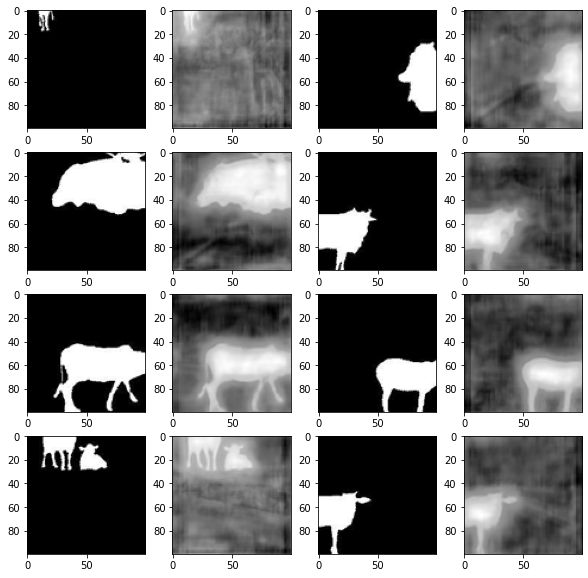

scaling masks between 0 and 1


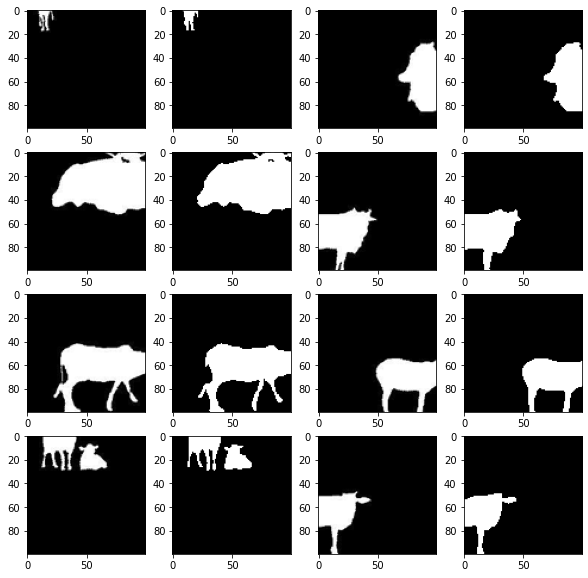

printing depth images


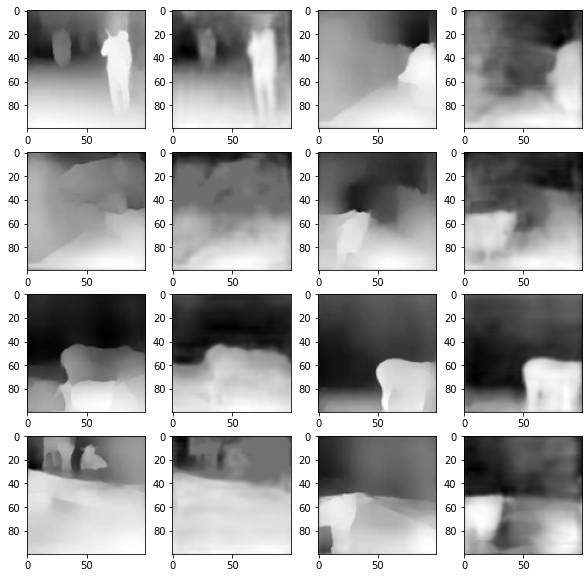


7018.779850244522


In [0]:
import torch.optim as optim
import torch.nn as nn
import time
import torchvision
#model=depth_model_new(name="depth_model_dilated_12k_model_12epochs")
#model.load_state_dict(torch.load("/content/drive/My Drive/depth_model_dilated.pt"))
#model.device = torch.device("cuda" if use_cuda else "cpu")
EPOCHS =5
#max_lr=1
optimizer = optim.SGD(model.parameters(), lr=0.1,momentum=0.9,nesterov=True)
#criterion=nn.L1Loss()
criterion=[nn.BCEWithLogitsLoss(),nn.L1Loss()]
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1.0, steps_per_epoch=len(train_loader)+1, epochs=EPOCHS,div_factor=10)#scheduler=optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=2,verbose=True)
# An example
'''model, optimizer = amp.initialize(
   model, optimizer, opt_level="O2", 
)'''
print("Initial LR- ",scheduler.get_lr())
print("Total steps - ", scheduler.total_steps)
print("No.of steps to increase LR -", scheduler.step_size_up)
print("No.of steps to reduce LR - ", scheduler.step_size_down)
#criterion = nn.BCEWithLogitsLoss()
start=time.time()
model.gotrain(model,optimizer, train_loader, test_loader, EPOCHS, "/content/drive/My Drive",criterion,writer,scheduler=scheduler)
print(time.time()-start)

# plotting training and testing accuarcies for 5 epochs by using 88000 images.

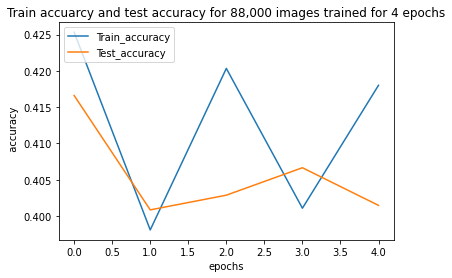

In [0]:
import matplotlib.pyplot as plt
plt.plot(model.stats().train_acc)
plt.plot(model.stats().test_acc)
plt.title('Train accuarcy and test accuracy for 88,000 images trained for 4 epochs')
plt.ylabel('  accuracy')
plt.xlabel('epochs')
plt.legend(['Train_accuracy', 'Test_accuracy'], loc='upper left')
plt.show()


# plotting training and test loss for 5 epochs

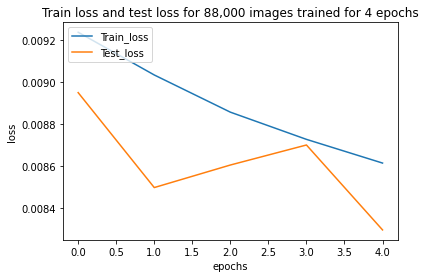

In [0]:
import matplotlib.pyplot as plt
plt.plot(model.stats().avg_train_loss)
plt.plot(model.stats().avg_test_loss)
plt.title('Train loss and test loss for 88,000 images trained for 4 epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train_loss', 'Test_loss'], loc='upper left')
plt.show()


# Now we have completed the model execution we will try to find outputs of one test image

In [0]:
cd /content

/content


# Reading the image and performing transformations on it.

In [0]:
img2=Image.open("/content/data/dataset_forAssignment/bg_images/Copy of bgimg001.jpg")
img1=Image.open("/content/data/dataset_forAssignment/output/images/fgbg000001.jpg")
img1 = img1.resize((100,100)) 
img2 = img2.resize((100,100)) 

img1=np.asarray(img1)
img2=np.asarray(img2)

img1=test_transforms[0](img1)
img2=test_transforms[1](img2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


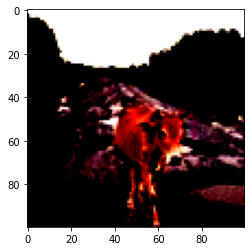

In [0]:
plt.imshow(img1.numpy().transpose(1,2,0))

# finding predictions on fg_bg image,and bg image

In [0]:
model.eval()
with torch.no_grad():
        img1,img2= img1.to(model.device),img2.to(model.device)
        img1,img2=img1.unsqueeze(0),img2.unsqueeze(0)
        print(img1.shape)
        output1,output2 = model(img1,img2)
        output1,output2=output1.squeeze(1),output2.squeeze(1)

torch.Size([1, 3, 100, 100])


# fucntion which Scales the image between 0 and 1 based on a condition

In [0]:
def return_image(img):
  img=img.cpu().numpy()
  for i,row in enumerate(img):
    for j,value in enumerate(row):
      if(value>0):
        img[i,j]=255
      else:
        img[i,j]=0
  return img

# Mask values in between any range

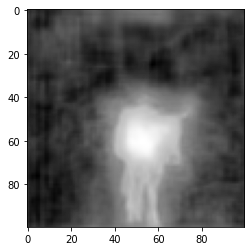

In [0]:
output1=output1.squeeze(0)

plt.imshow((output1).cpu().numpy()*255,cmap="gray")

# Mask values in between 0 and 1

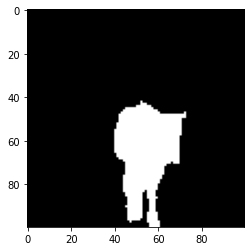

In [0]:
output1=output1.squeeze(0)

plt.imshow(return_image(output1),cmap="gray")

# Depth image of our test data

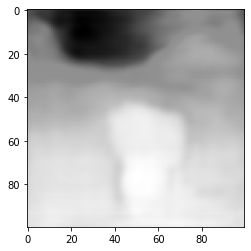

In [0]:
output2=output2.squeeze(0)

plt.imshow((output2).cpu().numpy()*255,cmap="gray")

# Wait a minute it is not good to only infer on test images when we are deploying. it might be any cow and any position so we have to infer on image which is never included in test and train_dataset

# Cross validation image on which it is never trained or infered.I hope my child will do okay.

# Code used for laying fg on bg 

In [0]:
img1=Image.open('/content/drive/My Drive/bg_image_crossvalidation.jpg')
img1=img1.resize((100,100))
img2=Image.open('/content/drive/My Drive/cow_inference_trans.png').convert("RGBA")
img2=img2.resize((50,50))
k+=1
print(k-1)
#print(img1.size)
#print(img2.size)
text_img=Image.new("RGBA",(100,100),(0,0,0,0))
text_img.paste(img1,(0,0))
#print(img1.size)
#print(img2.size)
y=random.randint(0,img1.size[1]-img2.size[1])
x=random.randint(0,img1.size[0]-img2.size[0])
text_img.paste(img2,(x,y),mask=img2)
text_img.thumbnail((100,100))
#display(text_img)
text_img=text_img.convert("RGB")
text_img.save("/content/image.jpg")

3999


# Applying transfromations and resizing them

In [0]:
img2=Image.open("/content/drive/My Drive/bg_image_crossvalidation.jpg")
img1=Image.open("/content/image.jpg")
img1 = img1.resize((100,100)) 
img2 = img2.resize((100,100)) 

img1=np.asarray(img1)
img2=np.asarray(img2)

img1=test_transforms[0](img1)
img2=test_transforms[1](img2)

# fg_bg display

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


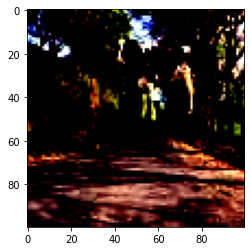

In [0]:
plt.imshow(img1.numpy().transpose(1,2,0))

# Sending inputs to model and obtaining results

In [0]:
model.eval()
with torch.no_grad():
        img1,img2= img1.to(model.device),img2.to(model.device)
        img1,img2=img1.unsqueeze(0),img2.unsqueeze(0)
        print(img1.shape)
        output1,output2 = model(img1,img2)
        output1,output2=output1.squeeze(1),output2.squeeze(1)

torch.Size([1, 3, 100, 100])


# mask in some range 

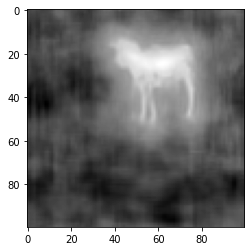

In [0]:
output1=output1.squeeze(0)

plt.imshow((output1).cpu().numpy()*255,cmap="gray")

# Mask in range 0-1

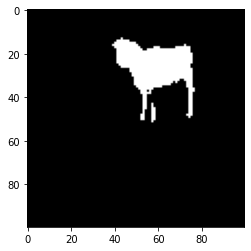

In [0]:
output1=output1.squeeze(0)

plt.imshow(return_image(output1),cmap="gray")

# depth image 

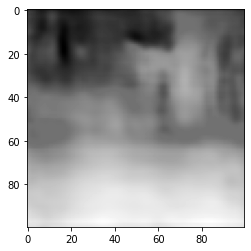

In [0]:
output2=output2.squeeze(0)

plt.imshow((output2).cpu().numpy()*255,cmap="gray")

# So here we ended the ride of predicting the depth and mask of image while providing fg_bg image and bg image. A much more detailed explaination is provided here [README](https://github.com/GadirajuSanjayvarma/S15/blob/master/README.md)